# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [3]:
# df1 = df

## Rename all the columns to lower case

In [4]:
#Your code here
for col in df.columns:
    new_cols = col.lower()
#     print(new_cols)

In [5]:
df = df.rename(columns={'LINENAME' : 'LINENAME'.lower()})
df.head()

,C/A,UNIT,SCP,STATION,linename,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [6]:
for col in df.columns:
    df = df.rename(columns={col : col.lower()})
df.head(0)

# or, from answer key:
# df.columns = [col.lower() for col in df.columns]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits


## Change the Index to be the Line Names

In [7]:
#Your code here
df = df.set_index('linename')

In [8]:
df.index ## column "linename" is indeed now the index

Index(['NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       ...
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],
      dtype='object', name='linename', length=197625)

# Change the index back

In [9]:
# Your code here
df = df.reset_index()

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [10]:
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


In [11]:
# Your code here
df['Num_Lines'] = df['linename'].map(lambda x: len(x))

## Write a function to clean a column name

In [12]:
# def clean(col_name):
#     cleaned = #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
#     return cleaned

In [13]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [14]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [15]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [18]:
df.date.head()

0    08/25/2018
1    08/25/2018
2    08/25/2018
3    08/25/2018
4    08/25/2018
Name: date, dtype: object

In [19]:
df.date = pd.to_datetime(df.date)

In [25]:
df.date.head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: date, dtype: datetime64[ns]

In [26]:
df['Dayofweek'] = df.date.dt.dayofweek

In [27]:
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


In [28]:
group1 = df.groupby('Dayofweek').sum()

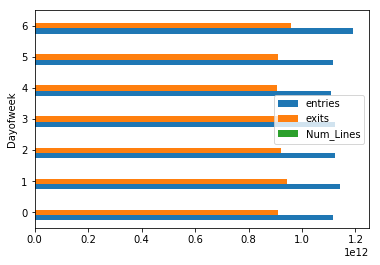

In [29]:
group1.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [32]:
#Your code here
group1['Weektype'] = grouped.Dayofweek.map()

,entries,exits,Num_Lines
Dayofweek,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573


In [ ]:
# Your answer here 

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.